In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_regression

In [58]:
X,y = make_regression( n_samples=500, n_features=1, bias=4.7, noise= 5 )
print X.shape, y.shape

(500, 1) (500,)


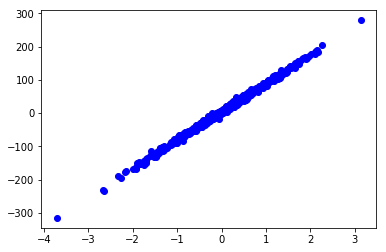

In [59]:
plt.scatter( X, y, c = 'blue' )
plt.show()

In [60]:
split = int(0.8*X.shape[0])
X_train = X[ :split ]
Y_train = y[ :split ]
X_test = X[ split: ]
Y_test = y[ split: ]
print X_train.shape, X_test.shape

(400, 1) (100, 1)


In [61]:
def hypothesis(x,w):
    x0 = 1
    return w[0]*x0 + w[1]*x

def getError(x,w,y_true):
    err = 0.0
    m = x.shape[0]
    for ix in range(m):
        err += ( y_true[ix] - hypothesis( x[ix], w ) )**2
    err = err/(2*m)
    return err


In [62]:
def get_grad(x, w, y_true):
    grad_0 = 0.0
    grad_1 = 0.0
    
    m = x.shape[0]
    
    for ix in range(m):
        grad_0 -= ( hypothesis( x[ix],w) - y_true[ix]  )
        grad_1 -= ( hypothesis( x[ix], w ) -  y_true[ix]  )*x[ix]
        
    grad_0 = grad_0/m
    grad_1 = grad_1/m
    
    return [grad_0, grad_1]

def stochastic_grad(x_sample, w, y_true):
    grad_0 = 0.0
    grad_1 = 0.0
    
    grad_0 -= ( hypothesis( x[ix],w) - y_true[ix]  )
    grad_1 -= ( hypothesis( x[ix], w ) -  y_true[ix]  )*x_sample
    
    return [grad_0, grad_1]

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lr = LinearRegression()
lr.fit( X_train, Y_train )
print lr.coef_, lr.intercept_
print 100*lr.score( X_test, Y_test )

[ 85.00136192] 4.77409952609
99.6066093771
